In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Настройки для лучшего отображения
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

STORE_ID = 'STORE_1'

print(f"Выбранный магазин: {STORE_ID}")

Выбранный магазин: STORE_1


### Зарузка и предобработка данных, создание объединенного датасета

In [4]:
# Загрузка данных о продажах
sales_df = pd.read_csv('data/shop_sales.csv')

# Загрузка данных календаря
calendar_df = pd.read_csv('data/shop_sales_dates.csv')

# Загрузка данных о ценах
prices_df = pd.read_csv('data/shop_sales_prices.csv')

print("Данные успешно загружены.")

Данные успешно загружены.


In [5]:
# Посмотрим на первые строки и общую информацию по каждому датафрейму

print("--- Данные о продажах (sales_df) ---")
print(sales_df.head())
print("\nИнформация:")
sales_df.info()
print("\nРазмер:", sales_df.shape)


--- Данные о продажах (sales_df) ---
       item_id store_id  date_id  cnt
0  STORE_2_085  STORE_2        1    3
1  STORE_2_085  STORE_2        2    8
2  STORE_2_085  STORE_2        3    0
3  STORE_2_085  STORE_2        4    3
4  STORE_2_085  STORE_2        5    0

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81855 entries, 0 to 81854
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   81855 non-null  object
 1   store_id  81855 non-null  object
 2   date_id   81855 non-null  int64 
 3   cnt       81855 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.5+ MB

Размер: (81855, 4)


In [6]:
print("\n\n--- Данные календаря (calendar_df) ---")
print(calendar_df.head())
print("\nИнформация:")
calendar_df.info()
print("\nРазмер:", calendar_df.shape)



--- Данные календаря (calendar_df) ---
         date  wm_yr_wk    weekday  wday  month  year event_name_1 event_type_1 event_name_2 event_type_2  date_id  CASHBACK_STORE_1  CASHBACK_STORE_2  CASHBACK_STORE_3
0  2011-01-29     11101   Saturday     1      1  2011          NaN          NaN          NaN          NaN        1                 0                 0                 0
1  2011-01-30     11101     Sunday     2      1  2011          NaN          NaN          NaN          NaN        2                 0                 0                 0
2  2011-01-31     11101     Monday     3      1  2011          NaN          NaN          NaN          NaN        3                 0                 0                 0
3  2011-02-01     11101    Tuesday     4      2  2011          NaN          NaN          NaN          NaN        4                 0                 1                 1
4  2011-02-02     11101  Wednesday     5      2  2011          NaN          NaN          NaN          NaN        5

In [7]:
print("\n\n--- Данные о ценах (prices_df) ---")
print(prices_df.head())
print("\nИнформация:")
prices_df.info()
print("\nРазмер:", prices_df.shape)



--- Данные о ценах (prices_df) ---
  store_id      item_id  wm_yr_wk  sell_price
0  STORE_2  STORE_2_085     11101        1.00
1  STORE_2  STORE_2_043     11101        2.88
2  STORE_2  STORE_2_054     11101        2.28
3  STORE_2  STORE_2_090     11101        1.25
4  STORE_2  STORE_2_252     11101        1.48

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11141 entries, 0 to 11140
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   store_id    11141 non-null  object 
 1   item_id     11141 non-null  object 
 2   wm_yr_wk    11141 non-null  int64  
 3   sell_price  11141 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 348.3+ KB

Размер: (11141, 4)


In [13]:
# Фильтрация данных о продажах для STORE_1
sales_store_df = sales_df[sales_df['store_id'] == STORE_ID].copy()

sales_store_df.drop('store_id', axis=1, inplace=True)

print(f"--- Данные о продажах для {STORE_ID} (sales_store_df) ---")
print(sales_store_df.head())
print("\nРазмер:", sales_store_df.shape)
print("\nКоличество уникальных товаров:", sales_store_df['item_id'].nunique())

--- Данные о продажах для STORE_1 (sales_store_df) ---
           item_id  date_id  cnt
54570  STORE_1_064        1    0
54571  STORE_1_064        2    1
54572  STORE_1_064        3    0
54573  STORE_1_064        4    0
54574  STORE_1_064        5    0

Размер: (27285, 3)

Количество уникальных товаров: 15


In [14]:
# Фильтрация данных о ценах для STORE_1
prices_store_df = prices_df[prices_df['store_id'] == STORE_ID].copy()
# Удаляем столбец store_id
prices_store_df.drop('store_id', axis=1, inplace=True)

print(f"\n--- Данные о ценах для {STORE_ID} (prices_store_df) ---")
print(prices_store_df.head())
print("\nРазмер:", prices_store_df.shape)
# Проверим, для скольких товаров есть информация о ценах
print("\nКоличество уникальных товаров в ценах:", prices_store_df['item_id'].nunique())
# Проверим количество записей о ценах на товар (может указывать на пропуски)
print("\nКоличество записей цен по товарам (минимум/максимум):")
print(prices_store_df.groupby('item_id').size().agg(['min', 'max']))


--- Данные о ценах для STORE_1 (prices_store_df) ---
        item_id  wm_yr_wk  sell_price
22  STORE_1_064     11101        2.54
23  STORE_1_065     11101        2.94
24  STORE_1_376     11101        1.98
25  STORE_1_090     11101        1.25
26  STORE_1_252     11101        1.48

Размер: (3873, 3)

Количество уникальных товаров в ценах: 15

Количество записей цен по товарам (минимум/максимум):
min    233
max    260
dtype: int64


In [ ]:
# Преобразование столбца 'date' в формат datetime в calendar_df
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

# Определяем правильное имя столбца кэшбэка
cashback_column_name = f'CASHBACK_{STORE_ID}'

# Выбираем нужные столбцы из календаря, включая правильный столбец кэшбэка
calendar_subset_df = calendar_df[['date_id', 'date', 'wm_yr_wk', 'weekday', 'wday',
                                  'month', 'year', 'event_name_1', 'event_type_1',
                                #   'event_name_2', 'event_type_2', # event_name_2 содержит всего 4 события, их не будем учитывать
                                  cashback_column_name]].copy()
# Переименовываем столбец кэшбэка для удобства
calendar_subset_df.rename(columns={cashback_column_name: 'cashback'}, inplace=True)

print("\n--- Подготовленный календарь (calendar_subset_df) ---")
print(calendar_subset_df.head())
print("\nТип данных столбца 'date':", calendar_subset_df['date'].dtype)
print("\nСтолбцы:", calendar_subset_df.columns)


--- Подготовленный календарь (calendar_subset_df) ---
   date_id       date  wm_yr_wk    weekday  wday  month  year event_name_1 event_type_1  cashback
0        1 2011-01-29     11101   Saturday     1      1  2011          NaN          NaN         0
1        2 2011-01-30     11101     Sunday     2      1  2011          NaN          NaN         0
2        3 2011-01-31     11101     Monday     3      1  2011          NaN          NaN         0
3        4 2011-02-01     11101    Tuesday     4      2  2011          NaN          NaN         0
4        5 2011-02-02     11101  Wednesday     5      2  2011          NaN          NaN         1

Тип данных столбца 'date': datetime64[ns]

Столбцы: Index(['date_id', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'cashback'], dtype='object')


In [16]:
# 1. Слияние продаж (sales_store_df) с календарем (calendar_subset_df) по 'date_id'
merged_df = pd.merge(sales_store_df,
                     calendar_subset_df,
                     on='date_id',
                     how='left')

print("--- Результат после слияния продаж и календаря ---")
print(merged_df.head())
print("\nРазмер:", merged_df.shape)
print("\nПроверка пропусков после первого слияния:\n", merged_df.isnull().sum())

--- Результат после слияния продаж и календаря ---
       item_id  date_id  cnt       date  wm_yr_wk    weekday  wday  month  year event_name_1 event_type_1  cashback
0  STORE_1_064        1    0 2011-01-29     11101   Saturday     1      1  2011          NaN          NaN         0
1  STORE_1_064        2    1 2011-01-30     11101     Sunday     2      1  2011          NaN          NaN         0
2  STORE_1_064        3    0 2011-01-31     11101     Monday     3      1  2011          NaN          NaN         0
3  STORE_1_064        4    0 2011-02-01     11101    Tuesday     4      2  2011          NaN          NaN         0
4  STORE_1_064        5    0 2011-02-02     11101  Wednesday     5      2  2011          NaN          NaN         1

Размер: (27285, 12)

Проверка пропусков после первого слияния:
 item_id             0
date_id             0
cnt                 0
date                0
wm_yr_wk            0
weekday             0
wday                0
month               0
year        

In [18]:
# 2. Слияние полученного датафрейма (merged_df) с ценами (prices_store_df)
#    Слияние по 'item_id' и 'wm_yr_wk'
final_df = pd.merge(merged_df,
                    prices_store_df,
                    on=['item_id', 'wm_yr_wk'],
                    how='left') # Используем left join, чтобы сохранить все записи о продажах

final_df.sort_values(by=['item_id', 'date'], inplace=True)
final_df.reset_index(drop=True, inplace=True)

print("\n--- Финальный объединенный датафрейм (final_df) ---")
print(final_df.head())
print("\nРазмер:", final_df.shape)
# Проверим типы данных еще раз
print("\nТипы данных:\n", final_df.dtypes)


--- Финальный объединенный датафрейм (final_df) ---
       item_id  date_id  cnt       date  wm_yr_wk    weekday  wday  month  year event_name_1 event_type_1  cashback  sell_price
0  STORE_1_064        1    0 2011-01-29     11101   Saturday     1      1  2011          NaN          NaN         0        2.54
1  STORE_1_064        2    1 2011-01-30     11101     Sunday     2      1  2011          NaN          NaN         0        2.54
2  STORE_1_064        3    0 2011-01-31     11101     Monday     3      1  2011          NaN          NaN         0        2.54
3  STORE_1_064        4    0 2011-02-01     11101    Tuesday     4      2  2011          NaN          NaN         0        2.54
4  STORE_1_064        5    0 2011-02-02     11101  Wednesday     5      2  2011          NaN          NaN         1        2.54

Размер: (27285, 13)

Типы данных:
 item_id                 object
date_id                  int64
cnt                      int64
date            datetime64[ns]
wm_yr_wk           

In [19]:
# 3. Проверка пропусков в финальном датафрейме
print("\n--- Проверка пропусков в final_df ---")
missing_values = final_df.isnull().sum()
print(missing_values[missing_values > 0])


--- Проверка пропусков в final_df ---
event_name_1    25095
event_type_1    25095
sell_price        189
dtype: int64


Обработаем пропуски в столбцах событий и цен. Для событий просто заменим NaN на 'NoEvent'/'NoType'. Для цен применим метод fillna с прямым (ffill) и обратным (bfill) проходом внутри каждой группы товаров. Это заполнит пропуски ближайшей известной ценой для того же товара.

In [20]:
# Обработка пропусков в событиях
event_cols = ['event_name_1', 'event_type_1']
for col in event_cols:
    # Определяем значение для заполнения в зависимости от типа столбца
    fill_val = 'NoEvent' if 'name' in col else 'NoType'
    final_df[col].fillna(fill_val, inplace=True)

print("--- Проверка пропусков в событиях после заполнения ---")
print(final_df[event_cols].isnull().sum())

--- Проверка пропусков в событиях после заполнения ---
event_name_1    0
event_type_1    0
dtype: int64


In [21]:
# Обработка пропусков в ценах (sell_price)
# Используем ffill и bfill внутри группы по item_id
final_df['sell_price'] = final_df.groupby('item_id')['sell_price'].transform(lambda x: x.ffill().bfill())

print("\n--- Проверка пропусков в sell_price после заполнения ---")
print("Количество пропусков в sell_price:", final_df['sell_price'].isnull().sum())

# Проверим, остались ли пропуски (если товар вообще не имел цены)
if final_df['sell_price'].isnull().any():
    print("\nВНИМАНИЕ: Остались пропуски в ценах! Товары без цен:")
    print(final_df[final_df['sell_price'].isnull()]['item_id'].unique())


--- Проверка пропусков в sell_price после заполнения ---
Количество пропусков в sell_price: 0


### Общая визуализация, корреляция с ценами

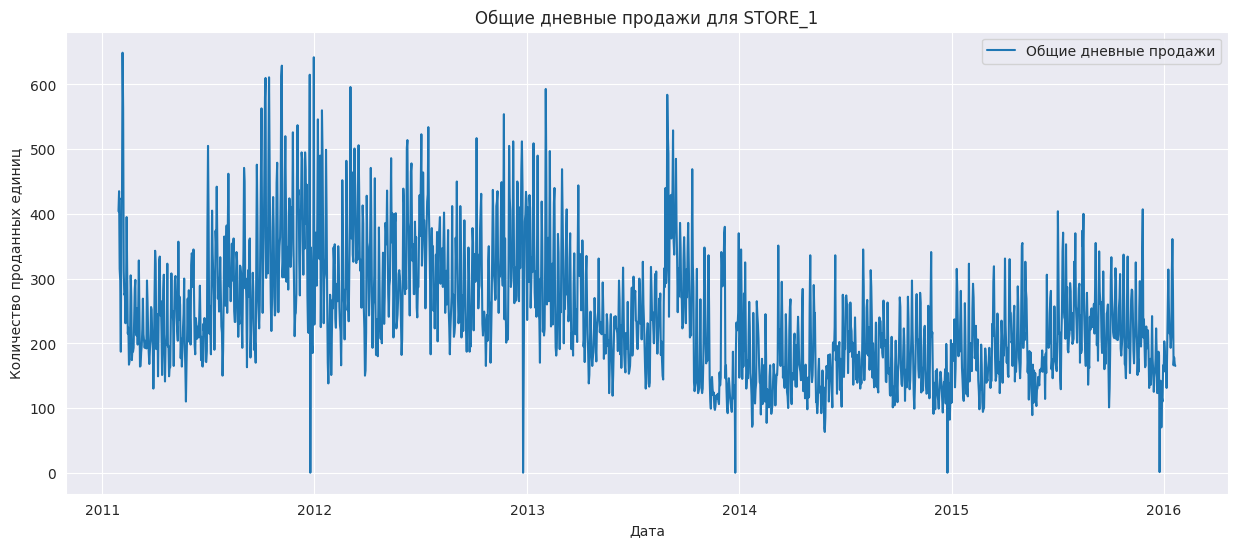

In [22]:
# Визуализация: Общие продажи магазина по дням
plt.figure(figsize=(15, 6))
daily_sales = final_df.groupby('date')['cnt'].sum()
plt.plot(daily_sales.index, daily_sales.values, label='Общие дневные продажи')
plt.title(f'Общие дневные продажи для {STORE_ID}')
plt.xlabel('Дата')
plt.ylabel('Количество проданных единиц')
plt.legend()
plt.show()

Видно что в районе нового года, скорее всего в рождество продаж нет, скорее всего магазин в эти дни не работал

Посмотрим на графики по отдельным товарам

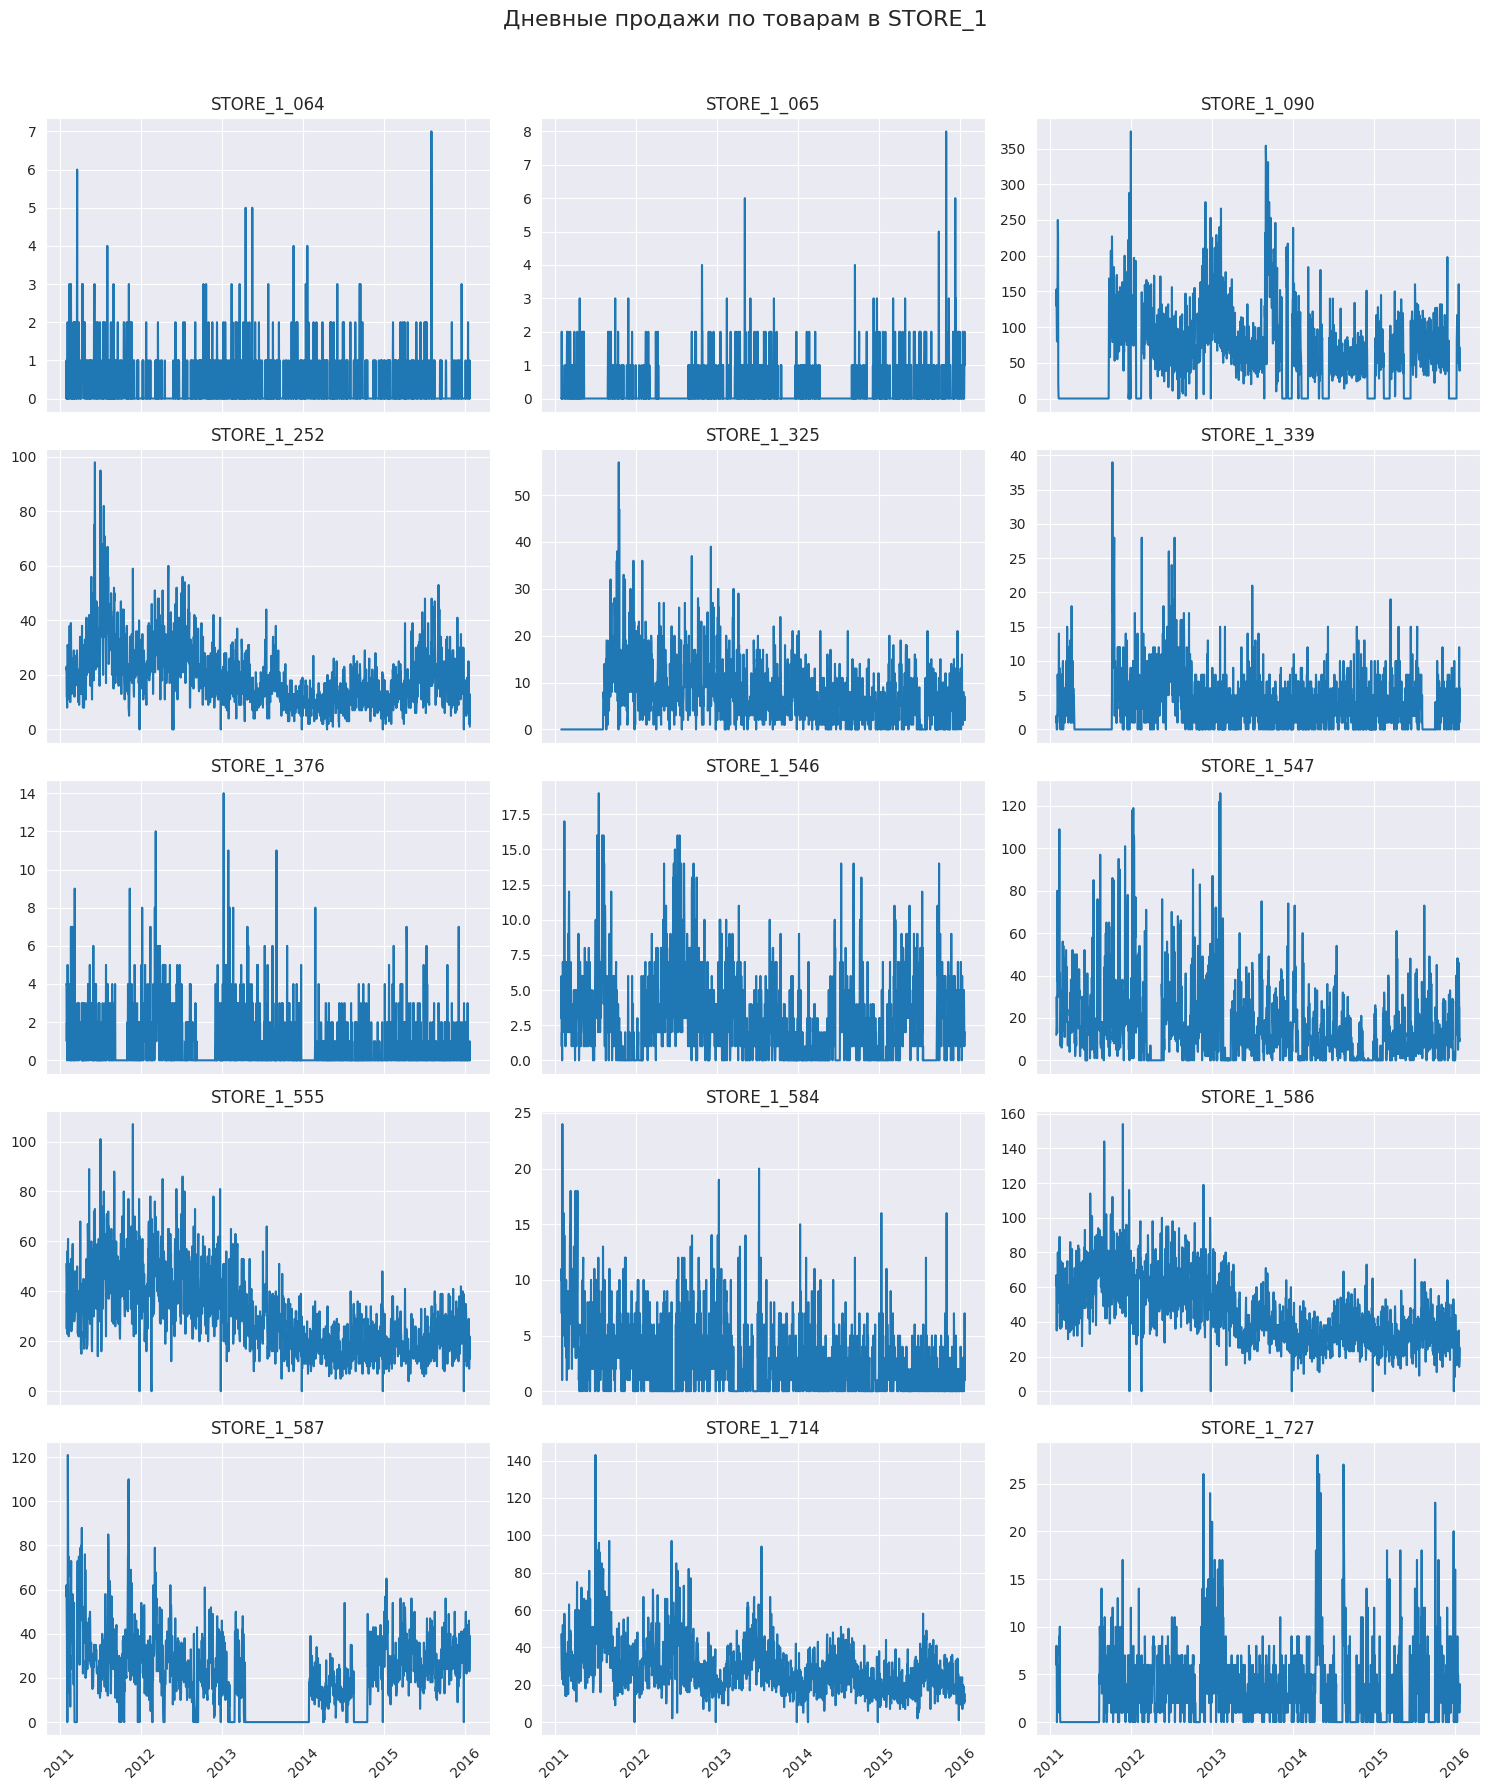

In [23]:
# Получаем список уникальных товаров в магазине
items = final_df['item_id'].unique()
num_items = len(items)

# Определяем сетку для графиков (например, 5 рядов по 3 колонки)
n_cols = 3
n_rows = int(np.ceil(num_items / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3.5), sharex=True)
# Преобразуем axes в плоский массив для удобства итерации
axes = axes.flatten()

for i, item_id in enumerate(items):
    # Фильтруем данные для текущего товара
    item_data = final_df[final_df['item_id'] == item_id]

    # Строим график
    ax = axes[i]
    ax.plot(item_data['date'], item_data['cnt'], label=item_id)
    ax.set_title(item_id)
    ax.tick_params(axis='x', rotation=45)
    # ax.legend() # Легенда может загромождать, убираем

# Убираем лишние пустые графики, если товаров не кратно n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Дневные продажи по товарам в {STORE_ID}', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Также посмотрим на изменения цен на товары, проверим есть ли корреляция с продажами

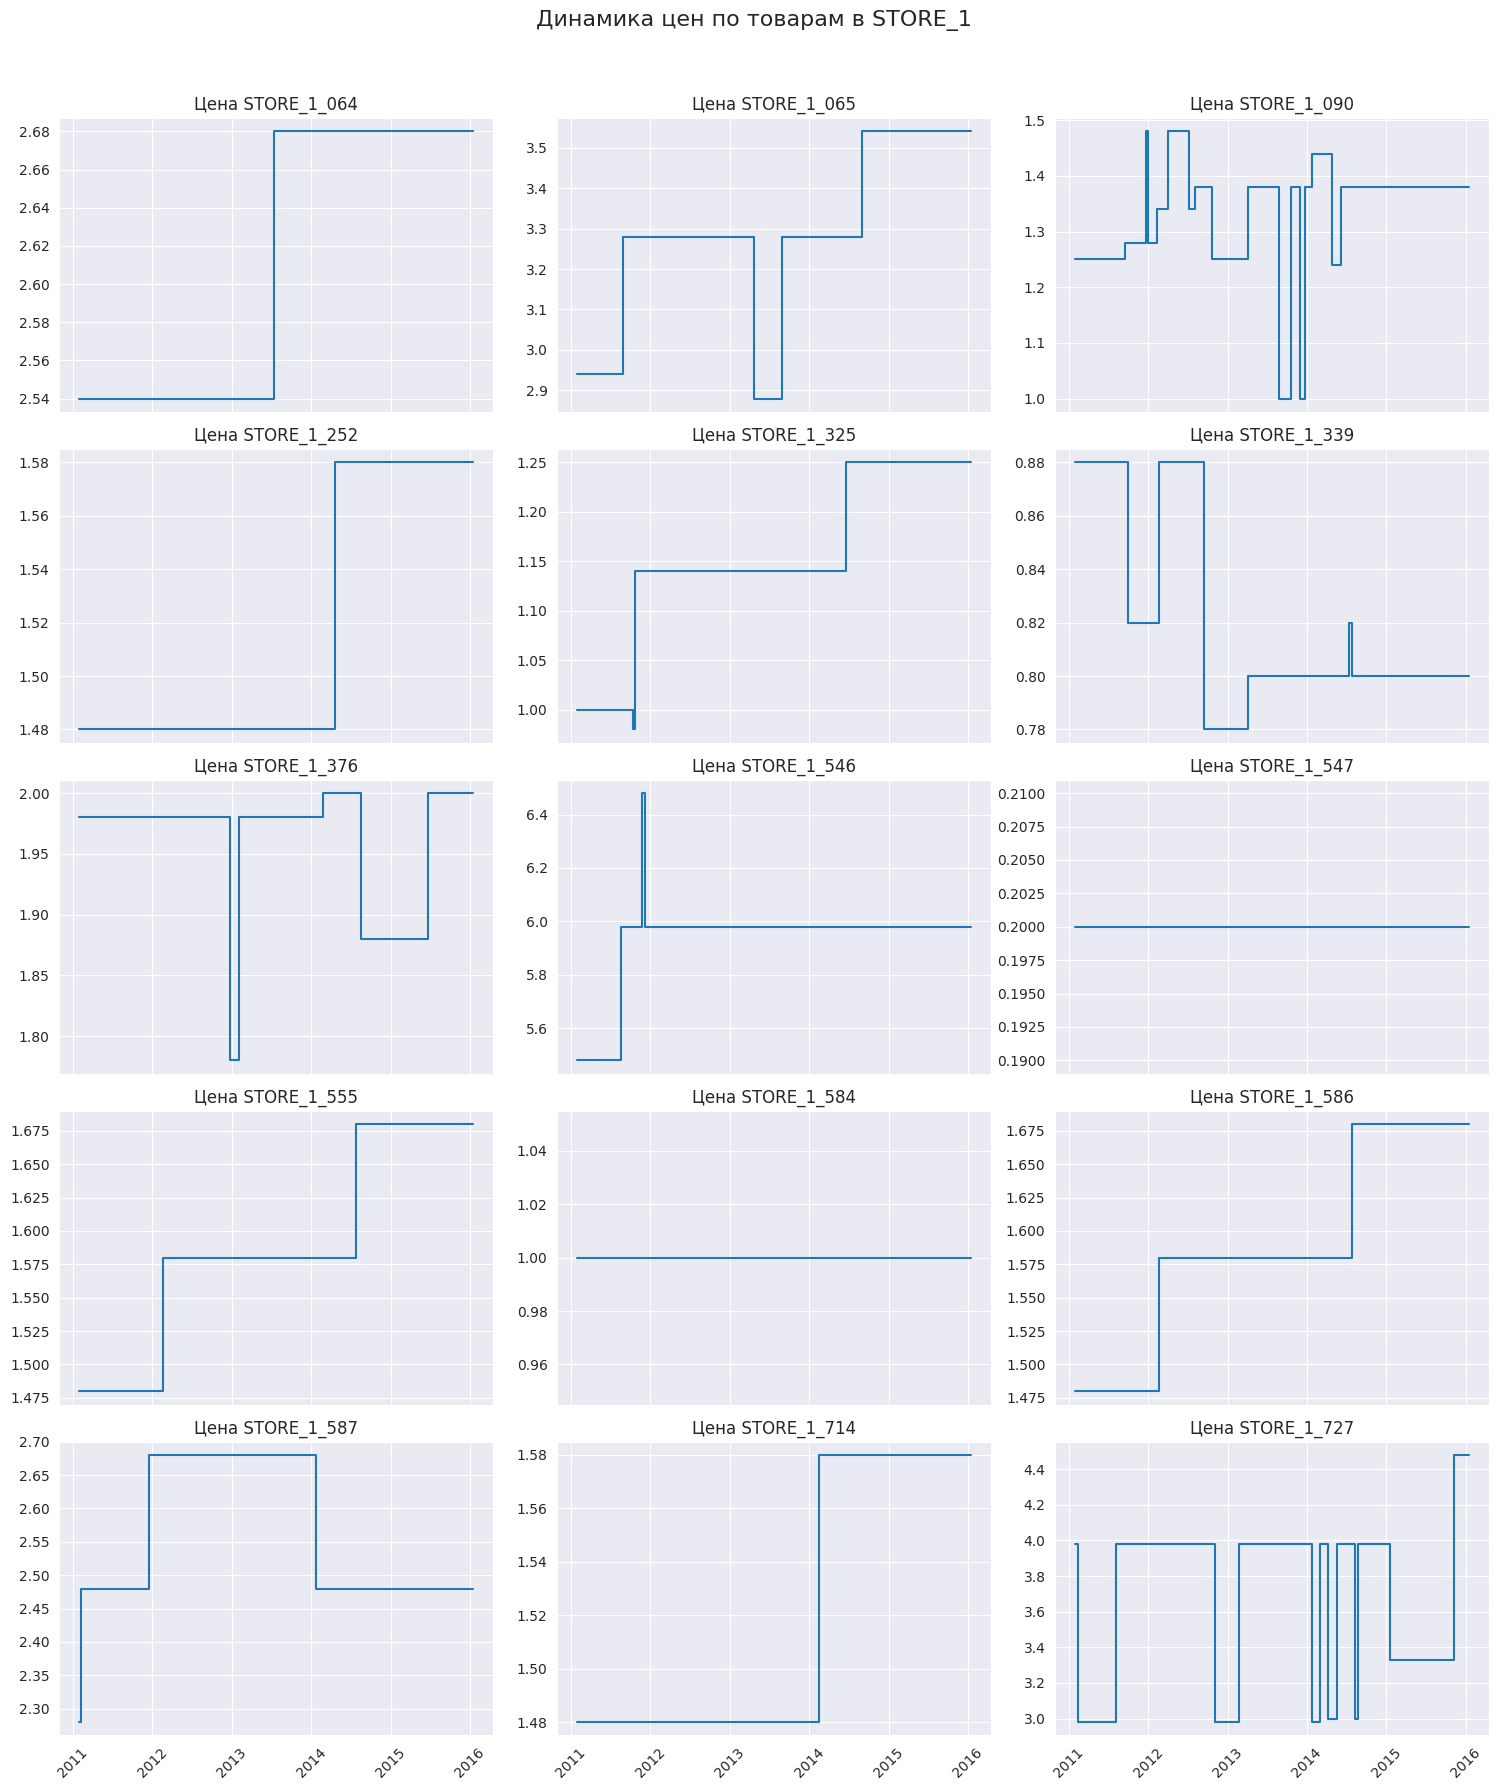

In [24]:
# Визуализация цен по товарам
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3.5), sharex=True)
axes = axes.flatten()

for i, item_id in enumerate(items):
    item_data = final_df[final_df['item_id'] == item_id]
    # Используем drop_duplicates, так как цена одинакова для всей недели
    item_price_data = item_data.drop_duplicates(subset=['wm_yr_wk'])

    ax = axes[i]
    ax.plot(item_price_data['date'], item_price_data['sell_price'], label=item_id, drawstyle='steps-post') # steps-post для ступенчатого графика
    ax.set_title(f'Цена {item_id}')
    ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Динамика цен по товарам в {STORE_ID}', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

--- Корреляция между ценой и продажами по товарам ---
STORE_1_064: -0.069
STORE_1_065: 0.034
STORE_1_090: -0.196
STORE_1_252: -0.280
STORE_1_325: 0.009
STORE_1_339: 0.104
STORE_1_376: -0.054
STORE_1_546: -0.180
STORE_1_547: Цена постоянна (корреляция не определена)
STORE_1_555: -0.530
STORE_1_584: Цена постоянна (корреляция не определена)
STORE_1_586: -0.535
STORE_1_587: -0.330
STORE_1_714: -0.325
STORE_1_727: -0.060


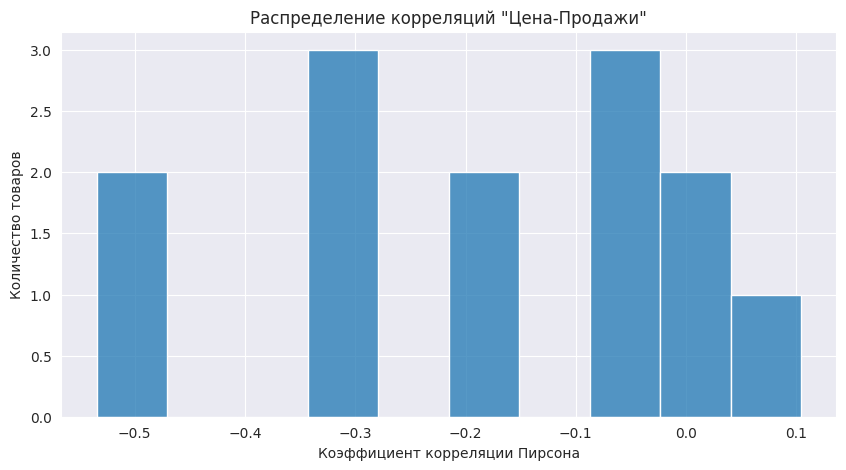


Товары с наиболее положительной/слабой корреляцией:
[('STORE_1_339', 0.10418246896263304), ('STORE_1_065', 0.03410592396724193), ('STORE_1_325', 0.008526380030010704)]

Товары с наиболее отрицательной корреляцией:
[('STORE_1_586', -0.5345363031107363), ('STORE_1_555', -0.5301102318884923), ('STORE_1_587', -0.32967042682432685)]


In [25]:
# Расчет корреляции между ценой и продажами для каждого товара
correlations = {}
print("--- Корреляция между ценой и продажами по товарам ---")
for item_id in items:
    item_data = final_df[final_df['item_id'] == item_id]
    # Рассчитываем корреляцию Пирсона
    # Проверяем, что стандартное отклонение цены не равно нулю, иначе корреляция не определена
    if item_data['sell_price'].std() > 1e-6: # Небольшой порог для избежания ошибок с константной ценой
         correlation = item_data['cnt'].corr(item_data['sell_price'])
         correlations[item_id] = correlation
         print(f"{item_id}: {correlation:.3f}")
    else:
         correlations[item_id] = np.nan # Или 0, если цена константна
         print(f"{item_id}: Цена постоянна (корреляция не определена)")

# Визуализация распределения корреляций
plt.figure(figsize=(10, 5))
sns.histplot(list(correlations.values()), bins=10, kde=False)
plt.title('Распределение корреляций "Цена-Продажи"')
plt.xlabel('Коэффициент корреляции Пирсона')
plt.ylabel('Количество товаров')
plt.show()

# Выведем товары с наиболее сильной (отрицательной) и слабой/положительной корреляцией
sorted_correlations = sorted(correlations.items(), key=lambda item: item[1], reverse=True) # Сортировка по значению корреляции
print("\nТовары с наиболее положительной/слабой корреляцией:")
print(sorted_correlations[:3])
print("\nТовары с наиболее отрицательной корреляцией:")
# Отфильтруем NaN перед выводом отрицательных
valid_neg_correlations = sorted([item for item in correlations.items() if not pd.isna(item[1])], key=lambda item: item[1])
print(valid_neg_correlations[:3])

**Отрицательная корреляция**: Большинство товаров (STORE_1_090, _252, _546, _555, _586, _587, _714) показывают отрицательную корреляцию, что логично: с ростом цены продажи падают.

**Сильная связь**: Товары STORE_1_555 и STORE_1_586 имеют наиболее выраженную отрицательную корреляцию (около -0.53). Для этих товаров цена является значимым фактором, влияющим на спрос. 

**Слабая связь**: У многих товаров (STORE_1_064, _065, _325, _376, _727) корреляция очень слабая (близка к нулю). Это может означать, что спрос на них не сильно эластичен по цене, либо изменения цен были незначительны, либо другие факторы (сезонность, праздники, тренды) оказывают большее влияние.

**Постоянная цена**: У товаров STORE_1_547 и STORE_1_584 цена не менялась за весь период, поэтому корреляцию посчитать невозможно. Цена не будет полезным признаком для прогнозирования изменений в продажах этих двух товаров, основываясь на исторических данных.

**Слабая положительная корреляция**: STORE_1_339 (0.104) и STORE_1_065 (0.034) показали слабую положительную корреляцию. Это может быть случайностью, либо указывать на влияние других факторов (например, рост популярности товара совпал с небольшим ростом цены).

### Проверка стационарности

Теперь проверим ряды продаж на стационарность. Стационарный ряд — это ряд, статистические свойства которого (среднее, дисперсия, автокорреляция) не меняются со временем.

При одновременном применении критериев KPSS и ADF могут получиться следующие результаты:
    
* **Вариант 1**: Оба теста говорят, что ряд нестационарный – значит, ряд действительно нестационарный

* **Вариант 2**: Оба теста говорят, что ряд стационарный – ряд стационарный

* **Вариант 3**: KPSS говорит, что ряд стационарный, а ADF говорит, что ряд нестационарный – значит, у вр существует детерминированный тренд, который необходимо убрать, чтобы получить стационарный вр

* **Вариант 4**: KPSS говорит, что ряд нестационарный, а ADF - что ряд стационарный – значит, у вр существует стохастический тренд, который необходимо убрать, чтобы получить стационарный вр

In [24]:
import warnings
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.sm_exceptions import InterpolationWarning

# Функция для проведения тестов (с подавлением предупреждений KPSS)
def check_stationarity(series, item_id):
    # ADF Test
    adf_result = adfuller(series)
    adf_pvalue = adf_result[1]
    adf_stationary = adf_pvalue < 0.05 # ADF H0: non-stationary (unit root)

    # KPSS Test (around constant 'c') - подавляем InterpolationWarning
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=InterpolationWarning)
        kpss_result_c = kpss(series, regression='c', nlags='auto')
        kpss_pvalue_c = kpss_result_c[1]
        # KPSS H0: stationary (around constant). If p < 0.05, reject H0 -> non-stationary
        kpss_stationary_c = kpss_pvalue_c >= 0.05

    # Определяем результат тестов для наглядности
    adf_verdict = "Stationary" if adf_stationary else "Non-Stationary"
    kpss_verdict = "Stationary" if kpss_stationary_c else "Non-Stationary"

    # Формируем итоговую интерпретацию на основе 4-х правил
    if not adf_stationary and not kpss_stationary_c:
        # Вариант 1: Оба теста говорят: нестационарный
        interpretation = "Non-Stationary (ADF-, KPSS-)"
    elif adf_stationary and kpss_stationary_c:
        # Вариант 2: Оба теста говорят: стационарный
        interpretation = "Stationary (ADF+, KPSS+)"
    elif not adf_stationary and kpss_stationary_c:
        # Вариант 3: KPSS стационарный, ADF нестационарный -> Детерминированный тренд
        interpretation = "Deterministic Trend (ADF-, KPSS+)"
    elif adf_stationary and not kpss_stationary_c:
        # Вариант 4: KPSS нестационарный, ADF стационарный -> Стохастический тренд
        interpretation = "Stochastic Trend (ADF+, KPSS-)"


    return {
        'ADF p-value': round(adf_pvalue, 3),
        'ADF Verdict': adf_verdict,
        'KPSS (c) p-value': round(kpss_pvalue_c, 3),
        'KPSS Verdict': kpss_verdict,
        'Interpretation': interpretation
    }

# Применяем тесты ко всем товарам
stationarity_results = []
for item_id in items:
    item_data = final_df[final_df['item_id'] == item_id]['cnt']
    result = check_stationarity(item_data, item_id)
    result['item_id'] = item_id
    stationarity_results.append(result)

# Создаем DataFrame с результатами
stationarity_df = pd.DataFrame(stationarity_results)
stationarity_df.set_index('item_id', inplace=True)

print("--- Результаты тестов на стационарность ---")
# Выводим основные колонки для читаемости
print(stationarity_df[['ADF Verdict', 'KPSS Verdict', 'Interpretation']])

# Посчитаем итоги
print("\n--- Итоги по стационарности ---")
print(stationarity_df['Interpretation'].value_counts())

--- Результаты тестов на стационарность ---
                ADF Verdict    KPSS Verdict                  Interpretation
item_id                                                                    
STORE_1_064      Stationary  Non-Stationary  Stochastic Trend (ADF+, KPSS-)
STORE_1_065      Stationary  Non-Stationary  Stochastic Trend (ADF+, KPSS-)
STORE_1_090      Stationary  Non-Stationary  Stochastic Trend (ADF+, KPSS-)
STORE_1_252  Non-Stationary  Non-Stationary    Non-Stationary (ADF-, KPSS-)
STORE_1_325      Stationary  Non-Stationary  Stochastic Trend (ADF+, KPSS-)
STORE_1_339      Stationary  Non-Stationary  Stochastic Trend (ADF+, KPSS-)
STORE_1_376      Stationary  Non-Stationary  Stochastic Trend (ADF+, KPSS-)
STORE_1_546      Stationary  Non-Stationary  Stochastic Trend (ADF+, KPSS-)
STORE_1_547      Stationary  Non-Stationary  Stochastic Trend (ADF+, KPSS-)
STORE_1_555  Non-Stationary  Non-Stationary    Non-Stationary (ADF-, KPSS-)
STORE_1_584      Stationary  Non-Stationary 

**Выводы по стационарности:**

*   **Стационарный ряд (1 товар):** Только `STORE_1_727` является стационарным по обоим тестам. Для него теоретически можно применять модели, требующие стационарности, без предварительных преобразований.
*   **Стохастический тренд (11 товаров):** Большинство рядов (11 из 15) попадают в категорию "Stochastic Trend / Needs Differencing (ADF+, KPSS-)". Это наиболее частый случай для реальных экономических временных рядов. Он указывает на то, что ряды имеют единичный корень (интегрированы), и для достижения стационарности (чтобы использовать, например, ARIMA) потребуется взятие разностей (дифференцирование). Модели, которые сами обрабатывают нестационарность (как Prophet или некоторые конфигурации ETS, или ML-модели с правильными признаками), могут справиться с ними и без дифференцирования.
*   **Нестационарные (3 товара):** Товары `STORE_1_252`, `STORE_1_555`, `STORE_1_586` оба теста признали нестационарными.


### Разложение на тренд, сезонность и остатки

--- Декомпозиция временных рядов (STL, период=7) ---


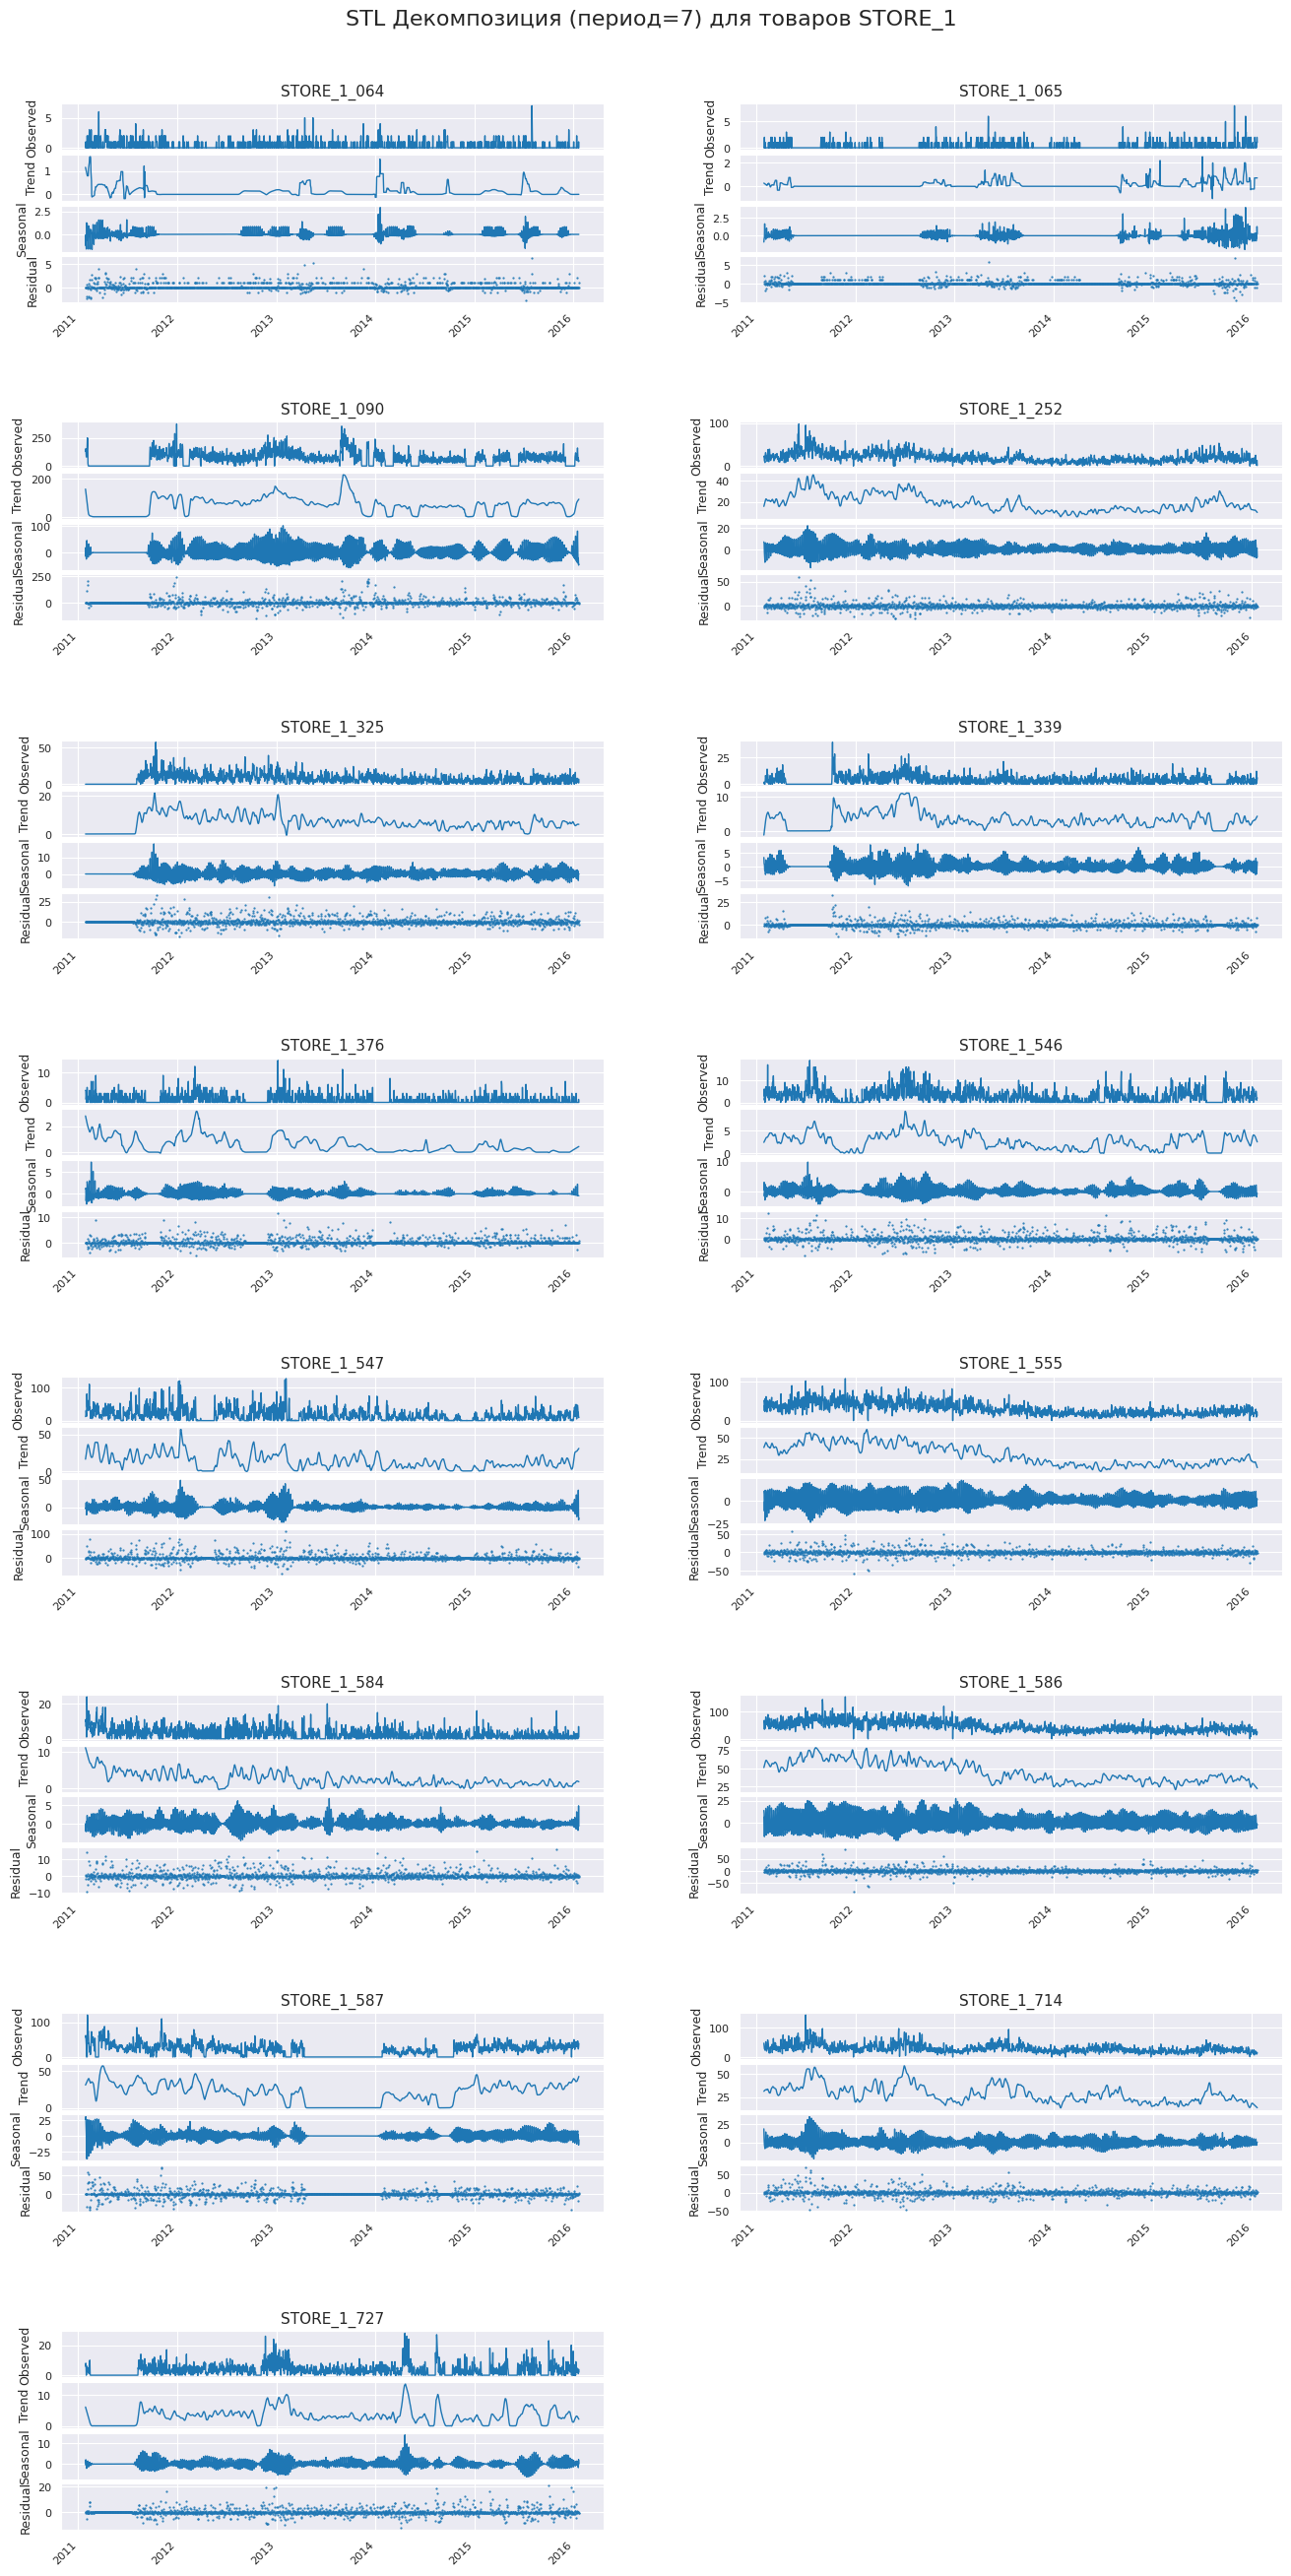

In [ ]:
from statsmodels.tsa.seasonal import STL
import matplotlib.gridspec as gridspec

# Устанавливаем индекс даты для удобства работы с STL
final_df_indexed = final_df.set_index('date')

print("--- Декомпозиция временных рядов (STL, период=7) ---")

# --- Изменения для компоновки ---
n_cols = 2 # Отображаем по 2 товара в ряду
n_rows = int(np.ceil(num_items / n_cols))

# Создаем основную фигуру
fig = plt.figure(figsize=(16, n_rows * 4)) # Скорректировал figsize

# Создаем основной GridSpec для товаров
outer_grid = gridspec.GridSpec(n_rows, n_cols, wspace=0.25, hspace=0.6)

for i, item_id in enumerate(items):
    item_series = final_df_indexed[final_df_indexed['item_id'] == item_id]['cnt']

    # Создаем "вложенный" GridSpec для 4-х графиков этого товара
    inner_grid = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=outer_grid[i], hspace=0.1) # 4 ряда, 1 колонка

    # Проверяем, достаточно ли данных для STL
    if len(item_series) >= 2 * 7:
        try:
            # Выполняем STL декомпозицию
            stl = STL(item_series, period=7, robust=True)
            res = stl.fit()

            # Создаем 4 оси с помощью inner_grid
            ax1 = fig.add_subplot(inner_grid[0]) # Original
            ax2 = fig.add_subplot(inner_grid[1], sharex=ax1) # Trend
            ax3 = fig.add_subplot(inner_grid[2], sharex=ax1) # Seasonal
            ax4 = fig.add_subplot(inner_grid[3], sharex=ax1) # Residual

            line_width = 1 # Толщина линий
            residual_marker_size = 1.5 # Размер точек остатков
            residual_alpha = 0.9 # Прозрачность точек остатков

            # Строим графики компонент
            ax1.plot(res.observed, linewidth=line_width)
            ax1.set_ylabel('Observed', fontsize=9)
            ax1.set_title(item_id, fontsize=11)
            ax1.grid(True)

            ax2.plot(res.trend, linewidth=line_width)
            ax2.set_ylabel('Trend', fontsize=9)
            ax2.grid(True)

            ax3.plot(res.seasonal, linewidth=line_width)
            ax3.set_ylabel('Seasonal', fontsize=9)
            ax3.grid(True)

            # Отображаем остатки точками
            ax4.scatter(res.resid.index, res.resid, s=residual_marker_size, alpha=residual_alpha, marker='.')
            ax4.set_ylabel('Residual', fontsize=9)
            ax4.grid(True)
            # --------------------------------

            # Скрываем тики на оси X для верхних трех графиков
            plt.setp(ax1.get_xticklabels(), visible=False)
            plt.setp(ax2.get_xticklabels(), visible=False)
            plt.setp(ax3.get_xticklabels(), visible=False)
            # Поворачиваем тики на нижнем графике
            plt.setp(ax4.get_xticklabels(), rotation=45, ha='right', fontsize=8)
            # Уменьшаем размер тиков на оси Y
            for ax in [ax1, ax2, ax3, ax4]:
                ax.tick_params(axis='y', labelsize=8)


        except Exception as e:
             ax = fig.add_subplot(outer_grid[i])
             ax.text(0.5, 0.5, f'STL Error: {e}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, wrap=True)
             ax.set_title(item_id)
             ax.set_xticks([])
             ax.set_yticks([])

    else:
        ax = fig.add_subplot(outer_grid[i])
        ax.text(0.5, 0.5, 'Недостаточно данных', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(item_id)
        ax.set_xticks([])
        ax.set_yticks([])


# Общий заголовок
plt.suptitle(f'STL Декомпозиция (период=7) для товаров {STORE_ID}', fontsize=16, y=0.91)

plt.show()

*   **Тренд:** Визуально тренды для многих товаров соответствуют результатам тестов на стационарность. Например, для `STORE_1_252`, `_555`, `_586` (которые были признаны нестационарными по обоим тестам) видны явные, нелинейные тренды или изменения среднего уровня. У стационарного `STORE_1_727` тренд относительно плоский, хотя и с некоторыми колебаниями.
*   **Сезонность (недельная):** У большинства товаров наблюдается четкая недельная сезонность. Пики продаж часто приходятся на выходные (суббота/воскресенье, которые в данных имеют `wday` 1 и 2) или около них, а спады - на будние дни. Однако форма и амплитуда сезонности могут различаться между товарами.
*   **Остатки:** В идеале остатки должны напоминать случайный шум без видимой структуры. На графиках видно, что у некоторых товаров (`_090`, `_555`, `_586`, `_714`) остатки имеют довольно большую дисперсию (разброс точек), особенно во время пиков продаж. У некоторых могут наблюдаться периоды повышенной волатильности. Также видны отдельные точки-выбросы. Это говорит о том, что модель "тренд + недельная сезонность" объясняет не всю вариативность данных.

Чтобы формально проверить, осталась ли в остатках какая-либо структура (например, автокорреляция), построим автокорреляционную (ACF) и частично автокорреляционную (PACF) функции для остатков декомпозиции. Если остатки являются "белым шумом", то на графиках ACF/PACF значимые лаги (выходящие за синий доверительный интервал) должны отсутствовать (кроме лага 0).

--- ACF/PACF остатков декомпозиции ---


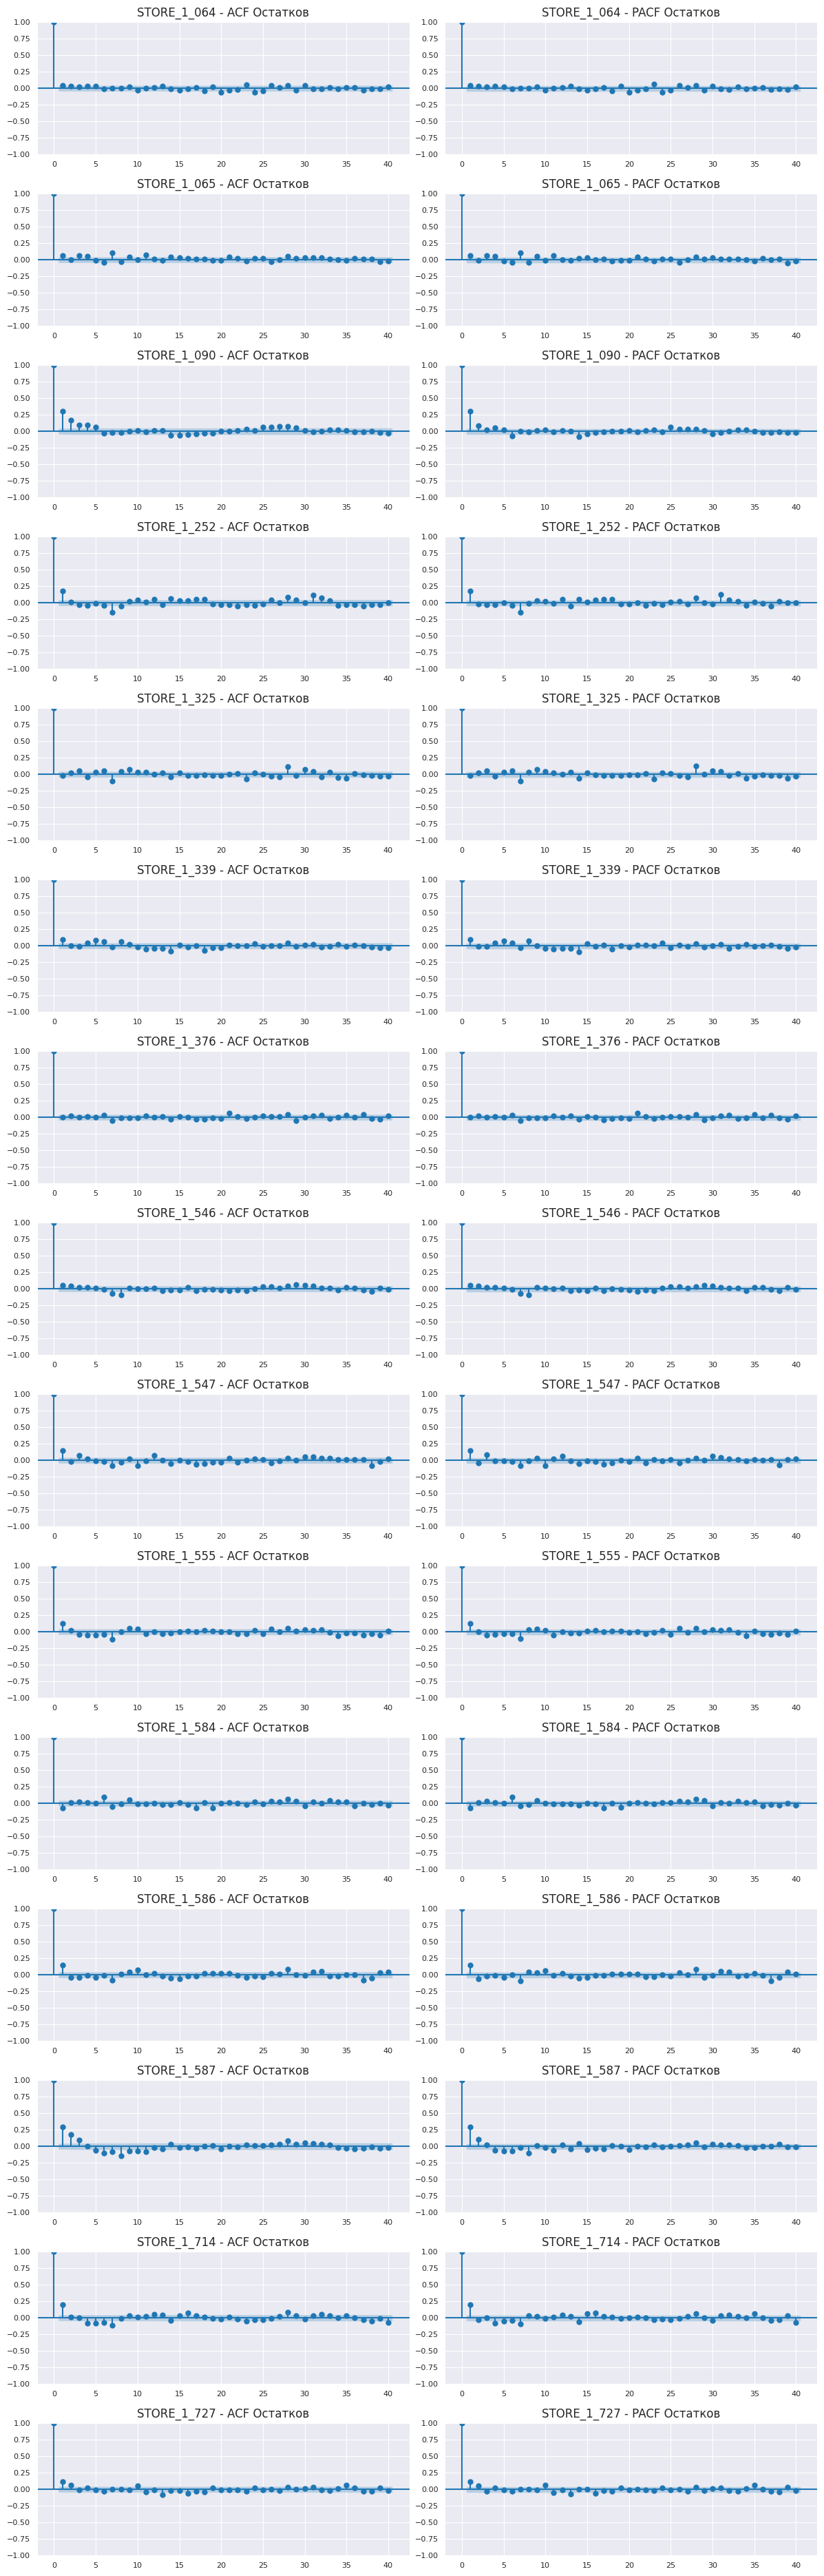

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print("--- ACF/PACF остатков декомпозиции ---")

# Определяем сетку для графиков ACF/PACF (по 2 графика на товар)
n_plots_per_item = 2 # ACF и PACF
n_cols_acf = 2 # По 2 товара в ряд
n_rows_acf = num_items

fig, axes = plt.subplots(n_rows_acf, n_cols_acf * n_plots_per_item // 2, figsize=(12, n_rows_acf * 2.5))

for i, item_id in enumerate(items):
    item_series = final_df_indexed[final_df_indexed['item_id'] == item_id]['cnt']

    # Получаем нужные оси для ACF и PACF этого товара
    ax_acf = axes[i, 0]
    ax_pacf = axes[i, 1]

    if len(item_series) >= 2 * 7:
        try:
            stl = STL(item_series, period=7, robust=True)
            res = stl.fit()
            residuals = res.resid

            # График ACF
            plot_acf(residuals, ax=ax_acf, lags=40, title=f'{item_id} - ACF Остатков')
            ax_acf.tick_params(axis='both', labelsize=8)


            # График PACF
            plot_pacf(residuals, ax=ax_pacf, lags=40, title=f'{item_id} - PACF Остатков', method='ywm')
            ax_pacf.tick_params(axis='both', labelsize=8)


        except Exception as e:
            ax_acf.text(0.5, 0.5, f'STL Error: {e}', ha='center', va='center', transform=ax_acf.transAxes)
            ax_pacf.text(0.5, 0.5, f'STL Error: {e}', ha='center', va='center', transform=ax_pacf.transAxes)
            ax_acf.set_title(f'{item_id} - ACF Остатков')
            ax_pacf.set_title(f'{item_id} - PACF Остатков')
    else:
        ax_acf.text(0.5, 0.5, 'Недостаточно данных', ha='center', va='center', transform=ax_acf.transAxes)
        ax_pacf.text(0.5, 0.5, 'Недостаточно данных', ha='center', va='center', transform=ax_pacf.transAxes)
        ax_acf.set_title(f'{item_id} - ACF Остатков')
        ax_pacf.set_title(f'{item_id} - PACF Остатков')


plt.tight_layout()
plt.show()

**Анализ автокорреляции остатков:**

*   **Не "белый шум":** У подавляющего большинства товаров остатки не являются "белым шумом". На графиках ACF и/или PACF видны значимые лаги на коротких лагах (1-5) и часто на лагах, кратных 7.
*   **Значимые короткие лаги:** Наличие значимых ACF/PACF на лагах 1, 2 и т.д. (например, у `_090`, `_547`, `_587`) указывает на оставшуюся краткосрочную автокорреляцию. Возможно, продажи вчера влияют на продажи сегодня, даже после учета тренда и недельной сезонности.
*   **Значимые сезонные лаги:** Присутствие значимых лагов на отметках 7, 14, 21 и т.д. говорит о том, что простая аддитивная недельная сезонность, выделенная STL, не полностью уловила все паттерны. Возможно, форма недельной сезонности меняется со временем, или есть более сложная сезонность.
*   **Товары с "чистыми" остатками:** У некоторых товаров (`_064`, `_065`, `_376`, `_727`) остатки выглядят ближе к белому шуму, хотя и там могут быть отдельные незначительные всплески.

**Вывод:** Простая модель "тренд + недельная сезонность" недостаточна для полного описания динамики продаж большинства товаров. В остатках содержится важная информация (автокорреляция), которую нужно учитывать при построении прогнозирующих моделей.

### Анализ событий
Посмотрим, какие типы событий есть в данных и как они могут влиять на продажи.

--- Уникальные типы событий (event_type_1) ---
[nan 'Sporting' 'Cultural' 'National' 'Religious']

--- Уникальные названия событий (event_name_1) ---
[nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']


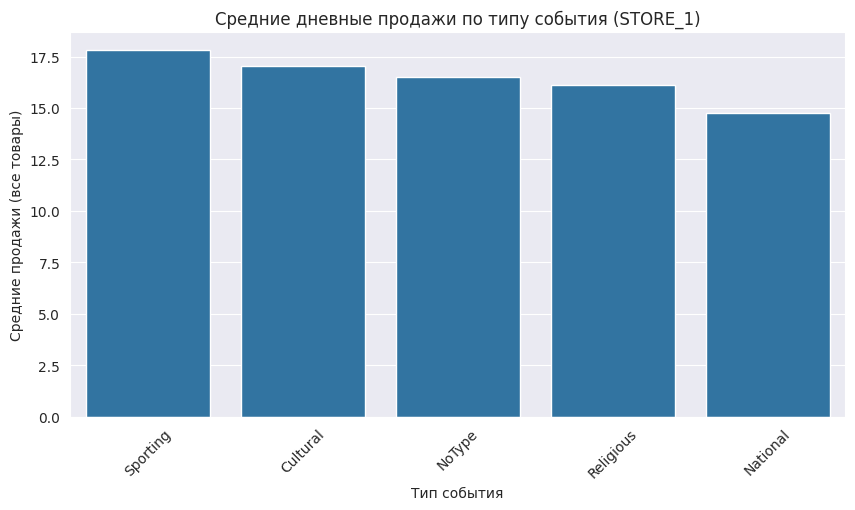


Средние продажи по типу события:
event_type_1
Sporting     17.817778
Cultural     17.041667
NoType       16.508946
Religious    16.095238
National     14.768000
Name: cnt, dtype: float64


In [29]:
# Уникальные типы и названия событий (из исходного calendar_df)
print("--- Уникальные типы событий (event_type_1) ---")
print(calendar_df['event_type_1'].unique())
print("\n--- Уникальные названия событий (event_name_1) ---")
print(calendar_df['event_name_1'].unique())

# Заменим NaN на 'NoEvent' в исходном calendar_df для анализа
calendar_df['event_name_1'].fillna('NoEvent', inplace=True)
calendar_df['event_type_1'].fillna('NoType', inplace=True)

# Посмотрим на средние продажи в дни с событиями и без для всего магазина
event_impact = final_df.groupby('event_type_1')['cnt'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=event_impact.index, y=event_impact.values)
plt.title(f'Средние дневные продажи по типу события ({STORE_ID})')
plt.ylabel('Средние продажи (все товары)')
plt.xlabel('Тип события')
plt.xticks(rotation=45)
plt.show()

print("\nСредние продажи по типу события:")
print(event_impact)


Средние продажи в день без события: 16.51
Средние продажи в день с событием: 16.03


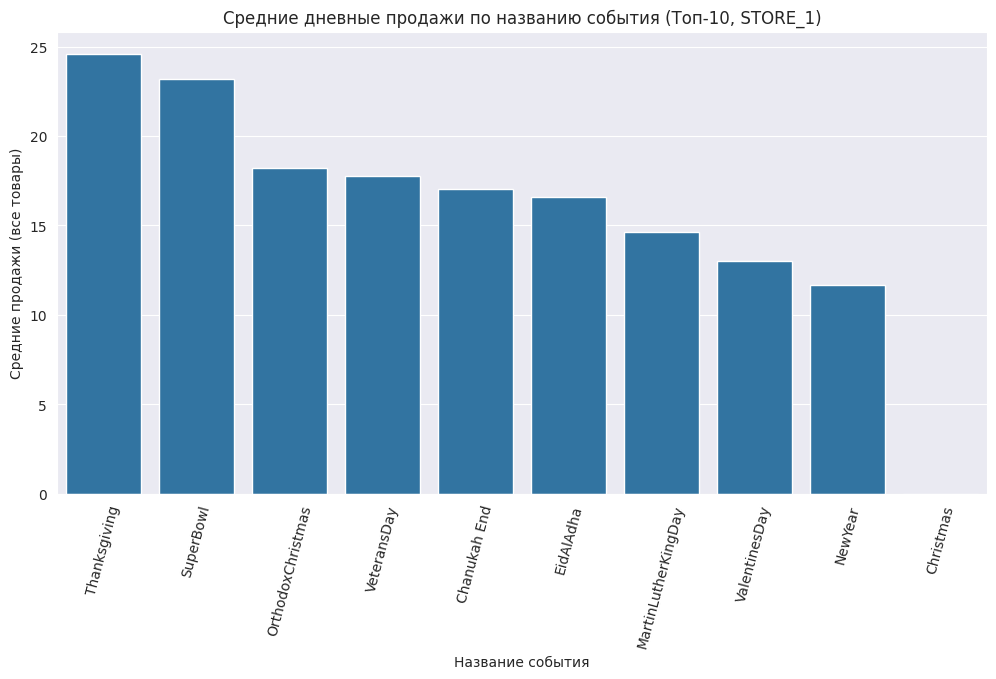


Средние продажи по названию события (Топ-10):
event_name_1
Thanksgiving           24.600000
SuperBowl              23.213333
OrthodoxChristmas      18.213333
VeteransDay            17.773333
Chanukah End           17.026667
EidAlAdha              16.600000
MartinLutherKingDay    14.653333
ValentinesDay          13.026667
NewYear                11.680000
Christmas               0.013333
Name: cnt, dtype: float64


In [30]:
# Посмотрим на влияние конкретных событий (топ N по частоте, исключая NoEvent)
top_events = calendar_df[calendar_df['event_name_1'] != 'NoEvent']['event_name_1'].value_counts().head(10).index.tolist()

# Создадим временный датафрейм для анализа влияния конкретных событий
temp_df_events = final_df[['date', 'event_name_1', 'cnt']].copy()
temp_df_events['is_event_day'] = temp_df_events['event_name_1'] != 'NoEvent'

# Средние продажи в дни событий и без
avg_sales_event_vs_no = temp_df_events.groupby('is_event_day')['cnt'].mean()
print(f"\nСредние продажи в день без события: {avg_sales_event_vs_no[False]:.2f}")
print(f"Средние продажи в день с событием: {avg_sales_event_vs_no[True]:.2f}")


# Средние продажи для топ-10 событий
event_name_impact = temp_df_events[temp_df_events['event_name_1'].isin(top_events)]\
                        .groupby('event_name_1')['cnt'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=event_name_impact.index, y=event_name_impact.values)
plt.title(f'Средние дневные продажи по названию события (Топ-10, {STORE_ID})')
plt.ylabel('Средние продажи (все товары)')
plt.xlabel('Название события')
plt.xticks(rotation=75) # Еще больший поворот для длинных названий
plt.show()

print("\nСредние продажи по названию события (Топ-10):")
print(event_name_impact)

*   **Типы событий:**
    *   `Sporting` (спортивные) и `Cultural` (культурные) события в среднем немного повышают продажи по сравнению с обычными днями (`NoType`).
    *   `Religious` (религиозные) и особенно `National` (национальные) праздники в среднем показывают продажи *ниже*, чем в обычные дни.
*   **Общее влияние событий:** Интересно, что в среднем день с *любым* событием (16.03) показывает чуть *меньшие* продажи, чем день без события (16.51). Это может быть связано с тем, что эффект национальных праздников (сильно снижающих продажи) перевешивает положительный эффект других типов событий.
*   **Конкретные события (Топ-10):**
    *   **Сильный рост:** `Thanksgiving` (День благодарения) и `SuperBowl` (Супербоул) вызывают значительный всплеск продаж. `OrthodoxChristmas` (Православное Рождество) и `VeteransDay` (День ветеранов) также показывают рост, но меньше.
    *   **Снижение:** `Christmas` (Рождество) приводит к почти полной остановке продаж (среднее 0.01), что логично, так как магазин, скорее всего, закрыт. `NewYear` (Новый год) и `ValentinesDay` (День св. Валентина) также показывают снижение продаж по сравнению с обычным днем. `MartinLutherKingDay` (День Мартина Лютера Кинга) тоже ниже среднего.
    *   **Нейтральные:** `Chanukah End` (Конец Хануки) и `EidAlAdha` (Курбан-Байрам) показывают продажи, близкие к средним.

**Выводы по событиям:**

1.  Праздники и события оказывают **существенное и разнонаправленное** влияние на продажи.
2.  Некоторые события (День благодарения, Супербоул) являются драйверами роста, другие (Рождество, Новый год) — причинами резкого спада.
3.  Учет этих событий **критически важен** для построения точной модели прогнозирования. Модели типа Prophet или использование dummy-переменных для событий в ML-моделях будут необходимы.
4.  Агрегация по типу события может скрывать важные детали, лучше анализировать влияние конкретных праздников.

### Общие выводы, сохранение предобработанных данных

Основные выводы:

*   Данные содержат информацию о продажах 15 товаров в магазине `STORE_1`.
*   Продажи большинства товаров нестационарны, часто имеют стохастический тренд.
*   Присутствует ярко выраженная недельная сезонность у большинства товаров.
*   Цена влияет на продажи некоторых товаров (особенно `_555`, `_586`), но не всех.
*   Праздники оказывают значительное, но разнонаправленное влияние.
*   Простая модель "тренд + сезонность" недостаточна, так как в остатках присутствует автокорреляция.

Сохраним данные для дальнейшего обучения моделей (models_training.ipynb)

In [31]:
# Определяем имя файла для сохранения
output_filename = f'data/processed_{STORE_ID}_data.csv'

# Сохраняем датафрейм в CSV
final_df.to_csv(output_filename, index=False)

print(f"Обработанный датафрейм для {STORE_ID} сохранен в файл: {output_filename}")
print(f"Размер сохраненного датафрейма: {final_df.shape}")

Обработанный датафрейм для STORE_1 сохранен в файл: data/processed_STORE_1_data.csv
Размер сохраненного датафрейма: (27285, 13)
